In [1]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#preprocessing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

#============== metric ===========================================
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# =============== 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.utils import shuffle
import time
import pandas as pd
from pandas_dq import dq_report,Fix_DQ
#import pandas as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#modeling
from sklearn.cluster import KMeans #melakukan clustering dengan k-means
from sklearn.metrics import silhouette_score #menghitung skor silhoute
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

Imported pandas_dq (1.22). Always upgrade to get latest features.



In [2]:
df = pd.read_excel("stunting-2022.xlsx")
df

,NO.,KECAMATAN,JUMLAH KELUARGA,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,TOTAL,TIDAK BERISIKO,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern
0,1,MALINGPING,18906,11108,720,580,639,540,1686,4165,6943,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977
1,2,PANGGARANGAN,12870,6886,716,720,656,472,661,3225,3661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643
2,3,BAYAH,12106,6355,45,79,157,208,841,1330,5025,192,1179,6252,59,347,178,37,1635,2,922,2286,2905
3,4,CIPANAS,12592,7191,319,410,592,588,1983,3892,3299,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184
4,5,MUNCANG,9692,6272,660,378,382,228,1844,3492,2780,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596
5,6,LEUWIDAMAR,17278,10923,1359,663,634,286,1271,4213,6710,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047
6,7,BOJONGMANIK,6924,4597,501,516,355,190,241,1803,2794,187,810,4563,64,514,812,43,1111,6,797,1708,2907
7,8,GUNUNGKENCANA,9953,6333,468,382,334,274,506,1964,4369,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286
8,9,BANJARSARI,15925,9807,1200,530,521,351,559,3161,6646,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607
9,10,CILELES,12895,7682,714,577,409,389,866,2955,4727,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 23 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   NO.                                                         29 non-null     object
 1   KECAMATAN                                                   28 non-null     object
 2   JUMLAH KELUARGA                                             29 non-null     int64 
 3   JUMLAH KELUARGA SASARAN                                     29 non-null     int64 
 4   PERINGKAT KESEJAHTERAAN 1                                   29 non-null     int64 
 5   PERINGKAT KESEJAHTERAAN 2                                   29 non-null     int64 
 6   PERINGKAT KESEJAHTERAAN 3                                   29 non-null     int64 
 7   PERINGKAT KESEJAHTERAAN 4                                   29 non-null     int64 
 8   PERINGKAT KE

In [4]:
#cek missing value
df.isnull().sum()

NO.                                                           0
KECAMATAN                                                     1
JUMLAH KELUARGA                                               0
JUMLAH KELUARGA SASARAN                                       0
PERINGKAT KESEJAHTERAAN 1                                     0
PERINGKAT KESEJAHTERAAN 2                                     0
PERINGKAT KESEJAHTERAAN 3                                     0
PERINGKAT KESEJAHTERAAN 4                                     0
PERINGKAT KESEJAHTERAAN\n> 4                                  0
TOTAL                                                         0
TIDAK BERISIKO                                                0
BADUTA (0-23 BULAN)                                           0
BALITA \n(24 - 59 BULAN)                                      0
PUS                                                           0
PUS HAMIL                                                     0
KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINU

In [5]:
# Menghapus baris yang memiliki nilai NaN di kolom 'KECAMATAN'
df = df.dropna(subset=['KECAMATAN'])

In [6]:
#cek duplicated
df.duplicated().sum()

0

In [7]:
df.describe()

,JUMLAH KELUARGA,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,TOTAL,TIDAK BERISIKO,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,13004.071429,8259.928571,496.785714,419.428571,428.000000,346.107143,1098.392857,2788.714286,5471.214286,680.857143,1954.964286,8141.642857,227.214286,812.357143,1640.857143,82.250000,1955.178571,20.214286,2129.964286,3496.964286,2612.214286
std,6345.118211,3864.706179,322.902732,177.945358,165.629216,125.182634,686.556212,895.834511,3451.437461,448.692810,1131.725182,3801.040961,129.469389,604.450728,779.582401,42.504575,908.691777,23.109012,1215.725587,1708.782770,1128.330932
min,5536.000000,3314.000000,45.000000,79.000000,150.000000,185.000000,241.000000,1288.000000,1295.000000,44.000000,545.000000,3275.000000,58.000000,97.000000,178.000000,31.000000,749.000000,2.000000,585.000000,1191.000000,1286.000000
25%,8761.250000,6045.250000,236.000000,279.500000,330.500000,267.000000,562.000000,2032.000000,3410.500000,356.750000,1273.000000,5954.500000,146.500000,339.500000,1112.750000,52.000000,1370.500000,7.500000,1206.750000,2408.500000,1847.250000
50%,12731.000000,7038.500000,449.000000,416.000000,408.500000,324.000000,929.000000,2703.000000,4754.000000,556.000000,1745.500000,6922.500000,208.000000,670.000000,1381.500000,75.500000,1718.000000,14.500000,2026.500000,3197.500000,2591.000000
75%,15767.500000,9932.750000,712.500000,571.000000,550.750000,398.750000,1686.000000,3483.000000,6662.000000,977.500000,2412.000000,9767.750000,295.000000,1023.500000,2147.250000,99.000000,2385.500000,21.750000,2573.000000,4445.750000,2934.500000
max,38553.000000,23517.000000,1359.000000,720.000000,780.000000,700.000000,3191.000000,4332.000000,19383.000000,2095.000000,6444.000000,23138.000000,622.000000,2391.000000,3113.000000,213.000000,5529.000000,120.000000,6429.000000,10080.000000,6794.000000


In [8]:
# Menampilkan kolom-kolom yang bertipe data numerik saja
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
df[numeric_cols]

,JUMLAH KELUARGA,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,TOTAL,TIDAK BERISIKO,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern
0,18906,11108,720,580,639,540,1686,4165,6943,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977
1,12870,6886,716,720,656,472,661,3225,3661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643
2,12106,6355,45,79,157,208,841,1330,5025,192,1179,6252,59,347,178,37,1635,2,922,2286,2905
3,12592,7191,319,410,592,588,1983,3892,3299,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184
4,9692,6272,660,378,382,228,1844,3492,2780,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596
5,17278,10923,1359,663,634,286,1271,4213,6710,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047
6,6924,4597,501,516,355,190,241,1803,2794,187,810,4563,64,514,812,43,1111,6,797,1708,2907
7,9953,6333,468,382,334,274,506,1964,4369,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286
8,15925,9807,1200,530,521,351,559,3161,6646,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607
9,12895,7682,714,577,409,389,866,2955,4727,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554


Fitur yang berpengaruh menentukakn class
1. variabel kesejahteraan keluarga 1- 5
2. variabel baduta
3. var balita
4. var pus
5. var pus hamil
6. var keluarga tidak memiliki sumber air minum utama yang layak
7. var keluarga tidak memiliki jamban yang layak
8. PUS 4 Terlalu Muda (Umur Istri < 20 Tahun)
9. PUS 4 Terlalu Tua (Umur Istri 35-40 Tahun)
10. PUS 4 Terlalu Dekat (< 2 Tahun)
11. PUS 4 Terlalu Banyak (3 Anak) PUS 4 terlalu
13. Bukan Peserta KB Modernta KB Modern


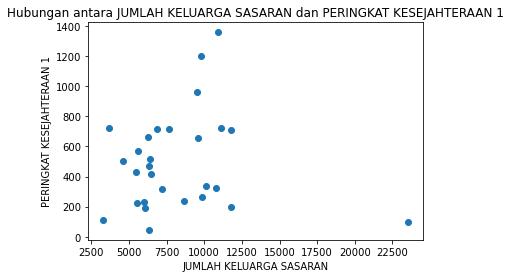

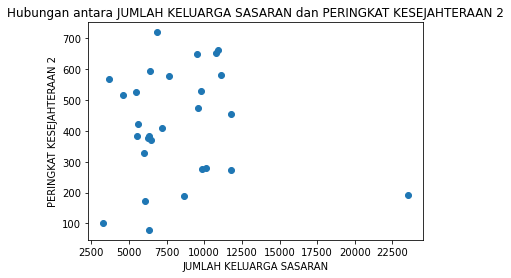

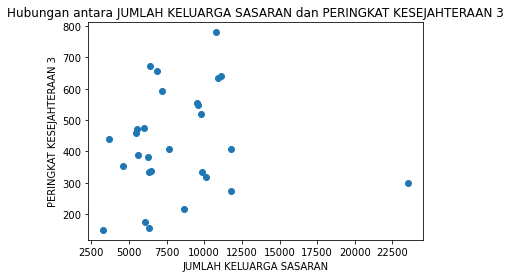

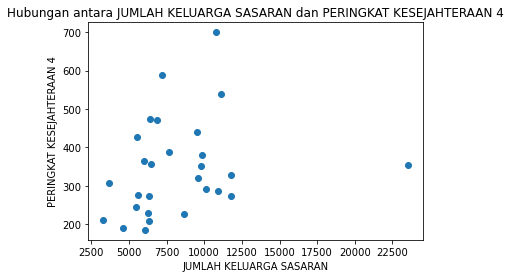

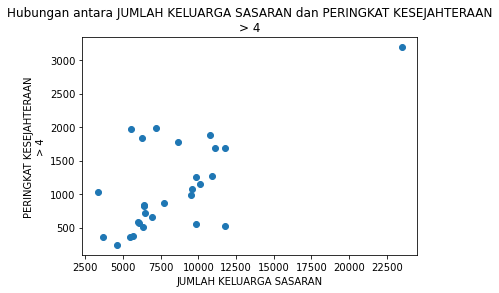

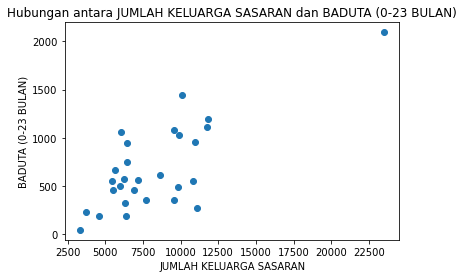

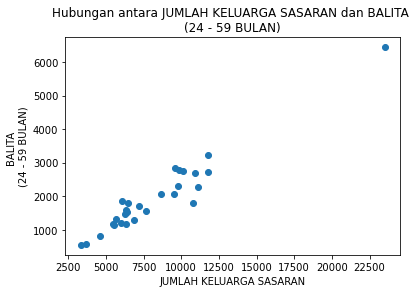

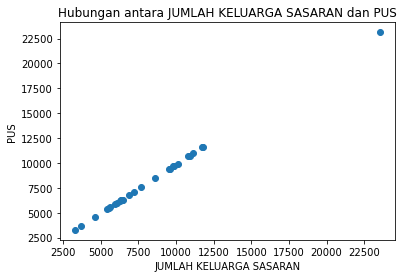

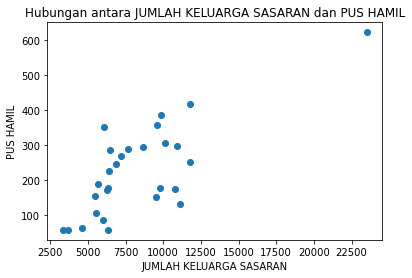

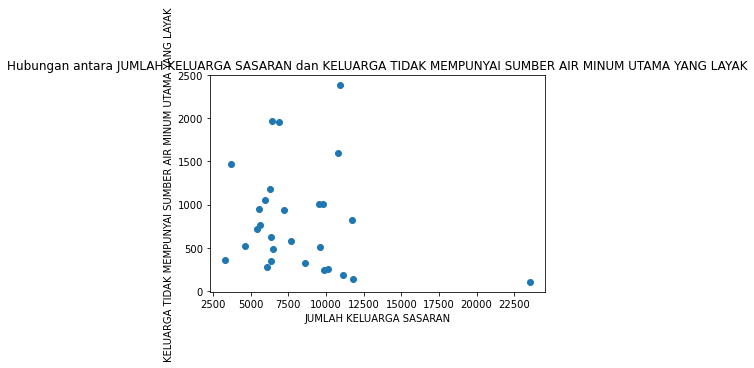

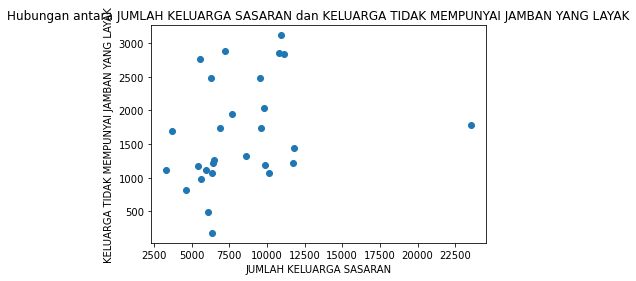

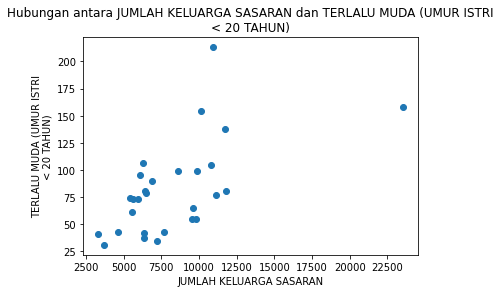

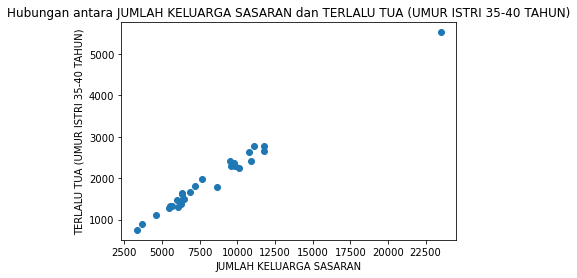

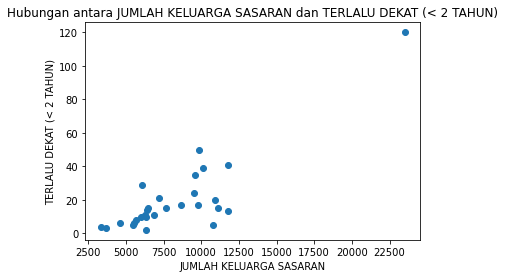

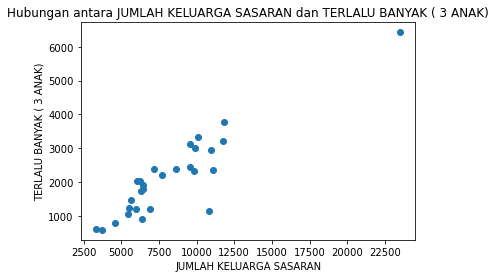

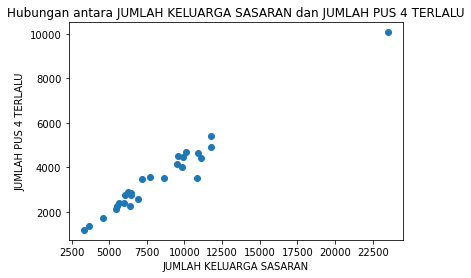

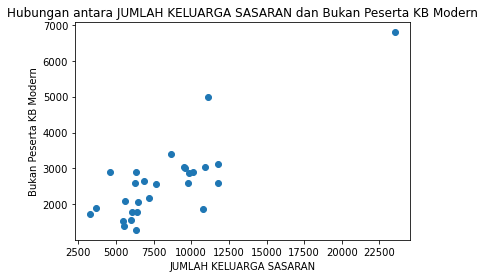

In [9]:
#JUMLAH KELUARGA SASARAN
plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['PERINGKAT KESEJAHTERAAN 1'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PERINGKAT KESEJAHTERAAN 1')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan PERINGKAT KESEJAHTERAAN 1')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['PERINGKAT KESEJAHTERAAN 2'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PERINGKAT KESEJAHTERAAN 2')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan PERINGKAT KESEJAHTERAAN 2')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['PERINGKAT KESEJAHTERAAN 3'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PERINGKAT KESEJAHTERAAN 3')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan PERINGKAT KESEJAHTERAAN 3')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['PERINGKAT KESEJAHTERAAN 4'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PERINGKAT KESEJAHTERAAN 4')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan PERINGKAT KESEJAHTERAAN 4')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['PERINGKAT KESEJAHTERAAN\n> 4'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PERINGKAT KESEJAHTERAAN\n> 4')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan PERINGKAT KESEJAHTERAAN\n> 4')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['BADUTA (0-23 BULAN)'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('BADUTA (0-23 BULAN)')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan BADUTA (0-23 BULAN)')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['BALITA \n(24 - 59 BULAN)'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('BALITA \n(24 - 59 BULAN)')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan BALITA \n(24 - 59 BULAN)')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['PUS'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PUS')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan PUS')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['PUS HAMIL'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PUS HAMIL')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan PUS HAMIL')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['TERLALU TUA (UMUR ISTRI 35-40 TAHUN)'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('TERLALU TUA (UMUR ISTRI 35-40 TAHUN)')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan TERLALU TUA (UMUR ISTRI 35-40 TAHUN)')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['TERLALU DEKAT (< 2 TAHUN)'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('TERLALU DEKAT (< 2 TAHUN)')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan TERLALU DEKAT (< 2 TAHUN)')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['TERLALU BANYAK ( 3 ANAK)'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('TERLALU BANYAK ( 3 ANAK)')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan TERLALU BANYAK ( 3 ANAK)')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['JUMLAH PUS 4 TERLALU'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('JUMLAH PUS 4 TERLALU')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan JUMLAH PUS 4 TERLALU')
plt.show()

plt.scatter(df['JUMLAH KELUARGA SASARAN'], df['Bukan Peserta KB Modern'])
plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('Bukan Peserta KB Modern')
plt.title('Hubungan antara JUMLAH KELUARGA SASARAN dan Bukan Peserta KB Modern')
plt.show()

In [10]:
cluster_data = df.drop(["NO.","KECAMATAN","JUMLAH KELUARGA", "TOTAL", "TIDAK BERISIKO"], axis=1)
cluster_data.head()

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596


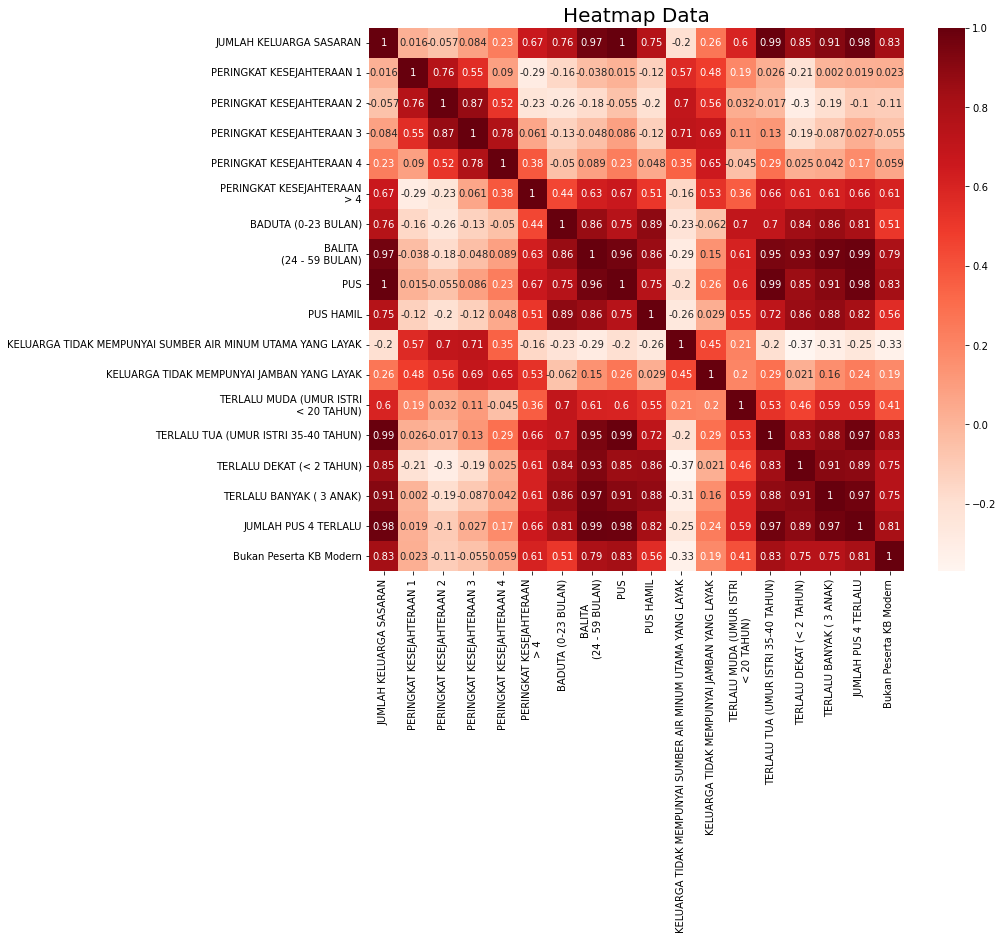

In [11]:
# Features Selection
plt.figure(figsize=(12,10))
sns.heatmap(cluster_data.corr(), cmap = 'Reds', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

In [12]:
cluster_data.isna().sum()

JUMLAH KELUARGA SASARAN                                       0
PERINGKAT KESEJAHTERAAN 1                                     0
PERINGKAT KESEJAHTERAAN 2                                     0
PERINGKAT KESEJAHTERAAN 3                                     0
PERINGKAT KESEJAHTERAAN 4                                     0
PERINGKAT KESEJAHTERAAN\n> 4                                  0
BADUTA (0-23 BULAN)                                           0
BALITA \n(24 - 59 BULAN)                                      0
PUS                                                           0
PUS HAMIL                                                     0
KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK    0
KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK                    0
TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)                         0
TERLALU TUA (UMUR ISTRI 35-40 TAHUN)                          0
TERLALU DEKAT (< 2 TAHUN)                                     0
TERLALU BANYAK ( 3 ANAK)                

In [13]:
# Membagi dataset untuk masing-masing
peringkat_kesejahteraan1 = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
peringkat_kesejahteraan2 = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
peringkat_kesejahteraan3 = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
peringkat_kesejahteraan4 = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
peringkat_kesejahteraan4plus = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
baduta_0_23bulan = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
balita_24_59bulan = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)','PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
pus = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)','PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
pus_hamil = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
keluarga_tidak_mempunyai_jamban_yang_layak = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
terlalu_muda_istri20 = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
terlalu_tua_istri3540 = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
terlalu_dekat_2tahun = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
terlalu_banyak_3anak = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern'])
jumlah_pus_4terlalu = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)',  'Bukan Peserta KB Modern'])
bukan_peserta_kb_modern = cluster_data.drop(columns=['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN 1', 'PERINGKAT KESEJAHTERAAN 2', 'PERINGKAT KESEJAHTERAAN 3', 'PERINGKAT KESEJAHTERAAN 4', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK', 'KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU',])

In [14]:
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

  File "C:\Users\NEL\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


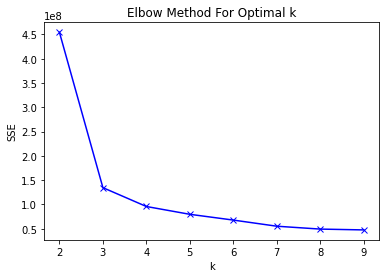

In [15]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5155229209116694
For n_clusters = 3, silhouette score is 0.54757775058977
For n_clusters = 4, silhouette score is 0.44554682195428846
For n_clusters = 5, silhouette score is 0.3146230455800369
For n_clusters = 6, silhouette score is 0.2634628665050442
For n_clusters = 7, silhouette score is 0.28013737899710006
For n_clusters = 8, silhouette score is 0.22798225091371666
For n_clusters = 9, silhouette score is 0.16744374388846153


In [17]:
cluster = KMeans(n_clusters=3)
cluster.fit(cluster_data)

KMeans(n_clusters=3)

In [18]:
# melakukan reset indeks pada cleaned_data dan peringkat_kesejahteraan1
cleaned_data = cluster_data.reset_index(drop=True)
peringkat_kesejahteraan1 = peringkat_kesejahteraan1.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(peringkat_kesejahteraan1)

# membuat series hasil clustering
segment_peringkat_kesejahteraan1 = pd.Series(cluster.labels_, name="segment_peringkat_kesejahteraan1")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([cleaned_data, segment_peringkat_kesejahteraan1], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0


In [19]:
# melakukan reset indeks pada cleaned_data dan peringkat_kesejahteraan2
cleaned_data = cluster_data.reset_index(drop=True)
peringkat_kesejahteraan2 = peringkat_kesejahteraan2.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(peringkat_kesejahteraan2)

# membuat series hasil clustering
segment_peringkat_kesejahteraan2 = pd.Series(cluster.labels_, name="segment_peringkat_kesejahteraan2")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_peringkat_kesejahteraan2], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2


In [20]:
# melakukan reset indeks pada cleaned_data dan peringkat_kesejahteraan3
cleaned_data = cluster_data.reset_index(drop=True)
peringkat_kesejahteraan3 = peringkat_kesejahteraan3.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(peringkat_kesejahteraan3)

# membuat series hasil clustering
segment_peringkat_kesejahteraan3 = pd.Series(cluster.labels_, name="segment_peringkat_kesejahteraan3")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_peringkat_kesejahteraan3], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2


In [21]:
# melakukan reset indeks pada cleaned_data dan peringkat_kesejahteraan4
cleaned_data = cluster_data.reset_index(drop=True)
peringkat_kesejahteraan4 = peringkat_kesejahteraan4.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(peringkat_kesejahteraan4)

# membuat series hasil clustering
segment_peringkat_kesejahteraan4 = pd.Series(cluster.labels_, name="segment_peringkat_kesejahteraan4")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_peringkat_kesejahteraan4], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1


In [22]:
# melakukan reset indeks pada cleaned_data dan peringkat_kesejahteraan4plus
cleaned_data = cluster_data.reset_index(drop=True)
peringkat_kesejahteraan4plus = peringkat_kesejahteraan4plus.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(peringkat_kesejahteraan4plus)

# membuat series hasil clustering
segment_peringkat_kesejahteraan4plus = pd.Series(cluster.labels_, name="segment_peringkat_kesejahteraan4plus")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_peringkat_kesejahteraan4plus], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0


In [23]:
# melakukan reset indeks pada cleaned_data dan baduta_0_23bulan
cleaned_data = cluster_data.reset_index(drop=True)
baduta_0_23bulan = baduta_0_23bulan.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(baduta_0_23bulan)

# membuat series hasil clustering
segment_baduta_0_23bulan = pd.Series(cluster.labels_, name="segment_baduta_0_23bulan")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_baduta_0_23bulan], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0


In [24]:
# melakukan reset indeks pada cleaned_data dan balita_24_59bulan
cleaned_data = cluster_data.reset_index(drop=True)
balita_24_59bulan = balita_24_59bulan.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(balita_24_59bulan)

# membuat series hasil clustering
segment_balita_24_59bulan = pd.Series(cluster.labels_, name="segment_balita_24_59bulan")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_balita_24_59bulan], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1


In [25]:
# melakukan reset indeks pada cleaned_data dan pus
cleaned_data = cluster_data.reset_index(drop=True)
pus = pus.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(pus)

# membuat series hasil clustering
segment_pus = pd.Series(cluster.labels_, name="segment_pus")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_pus], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0,0
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1,2
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1,2
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1,2
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1,2
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1,2


In [26]:
# melakukan reset indeks pada cleaned_data dan pus_hamil
cleaned_data = cluster_data.reset_index(drop=True)
pus_hamil = pus_hamil.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(pus_hamil)

# membuat series hasil clustering
segment_pus_hamil = pd.Series(cluster.labels_, name="segment_pus_hamil")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_pus_hamil], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus,segment_pus_hamil
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0,0,2
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1,2,0
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1,2,2
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2,0
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1,2,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0,0
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1,2,2
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2,0
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0,0
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1,2,0


In [27]:
# melakukan reset indeks pada cleaned_data dan keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak
cleaned_data = cluster_data.reset_index(drop=True)
keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak = keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak)

# membuat series hasil clustering
segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak = pd.Series(cluster.labels_, name="segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus,segment_pus_hamil,segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0,0,2,2
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1,2,0,1
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1,2,2,2
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2,0,0
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1,2,0,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0,0,1
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1,2,2,2
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2,0,0
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0,0,0
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1,2,0,2


In [28]:
# melakukan reset indeks pada cleaned_data dan keluarga_tidak_mempunyai_jamban_yang_layak
cleaned_data = cluster_data.reset_index(drop=True)
keluarga_tidak_mempunyai_jamban_yang_layak = keluarga_tidak_mempunyai_jamban_yang_layak.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(keluarga_tidak_mempunyai_jamban_yang_layak)

# membuat series hasil clustering
segment_keluarga_tidak_mempunyai_jamban_yang_layak = pd.Series(cluster.labels_, name="segment_keluarga_tidak_mempunyai_jamban_yang_layak")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_keluarga_tidak_mempunyai_jamban_yang_layak], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus,segment_pus_hamil,segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak,segment_keluarga_tidak_mempunyai_jamban_yang_layak
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0,0,2,2,1
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1,2,0,1,2
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1,2,2,2,0
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2,0,0,1
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1,2,0,0,1
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0,0,1,1
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1,2,2,2,0
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2,0,0,2
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0,0,0,1
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1,2,0,2,2


In [29]:
# melakukan reset indeks pada cleaned_data dan terlalu_muda_istri20
cleaned_data = cluster_data.reset_index(drop=True)
terlalu_muda_istri20 = terlalu_muda_istri20.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(terlalu_muda_istri20)

# membuat series hasil clustering
segment_terlalu_muda_istri20 = pd.Series(cluster.labels_, name="segment_terlalu_muda_istri20")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_terlalu_muda_istri20], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus,segment_pus_hamil,segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak,segment_keluarga_tidak_mempunyai_jamban_yang_layak,segment_terlalu_muda_istri20
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0,0,2,2,1,2
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1,2,0,1,2,2
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1,2,2,2,0,1
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2,0,0,1,1
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1,2,0,0,1,2
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0,0,1,1,0
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1,2,2,2,0,1
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2,0,0,2,1
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0,0,0,1,1
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1,2,0,2,2,1


In [30]:
# melakukan reset indeks pada cleaned_data dan terlalu_tua_istri3540
cleaned_data = cluster_data.reset_index(drop=True)
terlalu_tua_istri3540 = terlalu_tua_istri3540.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(terlalu_tua_istri3540)

# membuat series hasil clustering
segment_terlalu_tua_istri3540 = pd.Series(cluster.labels_, name="segment_terlalu_tua_istri3540")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_terlalu_tua_istri3540], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus,segment_pus_hamil,segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak,segment_keluarga_tidak_mempunyai_jamban_yang_layak,segment_terlalu_muda_istri20,segment_terlalu_tua_istri3540
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0,0,2,2,1,2,2
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1,2,0,1,2,2,0
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1,2,2,2,0,1,0
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2,0,0,1,1,0
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1,2,0,0,1,2,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0,0,1,1,0,2
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1,2,2,2,0,1,0
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2,0,0,2,1,0
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0,0,0,1,1,2
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1,2,0,2,2,1,2


In [31]:
# melakukan reset indeks pada cleaned_data dan terlalu_dekat_2tahun
cleaned_data = cluster_data.reset_index(drop=True)
terlalu_dekat_2tahun = terlalu_dekat_2tahun.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(terlalu_dekat_2tahun)

# membuat series hasil clustering
segment_terlalu_dekat_2tahun = pd.Series(cluster.labels_, name="segment_terlalu_dekat_2tahun")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_terlalu_dekat_2tahun], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus,segment_pus_hamil,segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak,segment_keluarga_tidak_mempunyai_jamban_yang_layak,segment_terlalu_muda_istri20,segment_terlalu_tua_istri3540,segment_terlalu_dekat_2tahun
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0,0,2,2,1,2,2,0
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1,2,0,1,2,2,0,0
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1,2,2,2,0,1,0,0
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2,0,0,1,1,0,0
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1,2,0,0,1,2,0,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0,0,1,1,0,2,0
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1,2,2,2,0,1,0,0
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2,0,0,2,1,0,0
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0,0,0,1,1,2,0
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1,2,0,2,2,1,2,0


In [32]:
# melakukan reset indeks pada cleaned_data dan terlalu_banyak_3anak
cleaned_data = cluster_data.reset_index(drop=True)
terlalu_banyak_3anak = terlalu_banyak_3anak.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(terlalu_banyak_3anak)

# membuat series hasil clustering
segment_terlalu_banyak_3anak = pd.Series(cluster.labels_, name="segment_terlalu_banyak_3anak")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_terlalu_banyak_3anak], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus,segment_pus_hamil,segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak,segment_keluarga_tidak_mempunyai_jamban_yang_layak,segment_terlalu_muda_istri20,segment_terlalu_tua_istri3540,segment_terlalu_dekat_2tahun,segment_terlalu_banyak_3anak
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0,0,2,2,1,2,2,0,0
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1,2,0,1,2,2,0,0,2
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1,2,2,2,0,1,0,0,2
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2,0,0,1,1,0,0,0
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1,2,0,0,1,2,0,0,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0,0,1,1,0,2,0,0
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1,2,2,2,0,1,0,0,2
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2,0,0,2,1,0,0,2
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0,0,0,1,1,2,0,0
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1,2,0,2,2,1,2,0,0


In [33]:
# melakukan reset indeks pada cleaned_data dan jumlah_pus_4terlalu
cleaned_data = cluster_data.reset_index(drop=True)
jumlah_pus_4terlalu = jumlah_pus_4terlalu.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(jumlah_pus_4terlalu)

# membuat series hasil clustering
segment_jumlah_pus_4terlalu = pd.Series(cluster.labels_, name="segment_jumlah_pus_4terlalu")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_jumlah_pus_4terlalu], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus,segment_pus_hamil,segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak,segment_keluarga_tidak_mempunyai_jamban_yang_layak,segment_terlalu_muda_istri20,segment_terlalu_tua_istri3540,segment_terlalu_dekat_2tahun,segment_terlalu_banyak_3anak,segment_jumlah_pus_4terlalu
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0,0,2,2,1,2,2,0,0,2
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1,2,0,1,2,2,0,0,2,0
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1,2,2,2,0,1,0,0,2,0
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2,0,0,1,1,0,0,0,0
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1,2,0,0,1,2,0,0,0,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0,0,1,1,0,2,0,0,2
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1,2,2,2,0,1,0,0,2,0
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2,0,0,2,1,0,0,2,0
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0,0,0,1,1,2,0,0,2
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1,2,0,2,2,1,2,0,0,0


In [34]:
# melakukan reset indeks pada cleaned_data dan bukan_peserta_kb_modern
cleaned_data = cluster_data.reset_index(drop=True)
bukan_peserta_kb_modern = bukan_peserta_kb_modern.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=3)
cluster.fit(bukan_peserta_kb_modern)

# membuat series hasil clustering
segment_bukan_peserta_kb_modern = pd.Series(cluster.labels_, name="segment_bukan_peserta_kb_modern")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results,segment_bukan_peserta_kb_modern], axis=1)

# menampilkan hasil
results

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN\n> 4,BADUTA (0-23 BULAN),BALITA \n(24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus,segment_pus_hamil,segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak,segment_keluarga_tidak_mempunyai_jamban_yang_layak,segment_terlalu_muda_istri20,segment_terlalu_tua_istri3540,segment_terlalu_dekat_2tahun,segment_terlalu_banyak_3anak,segment_jumlah_pus_4terlalu,segment_bukan_peserta_kb_modern
0,11108,720,580,639,540,1686,272,2282,10981,133,187,2829,77,2778,15,2362,4438,4977,0,2,0,2,1,0,0,0,2,2,1,2,2,0,0,2,1
1,6886,716,720,656,472,661,463,1297,6781,246,1956,1731,90,1657,11,1191,2590,2643,0,2,0,1,0,0,1,2,0,1,2,2,0,0,2,0,0
2,6355,45,79,157,208,841,192,1179,6252,59,347,178,37,1635,2,922,2286,2905,1,0,1,0,0,0,1,2,2,2,0,1,0,0,2,0,0
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2,0,0,1,1,0,0,0,0,2
4,6272,660,378,382,228,1844,570,1478,6168,172,1180,2478,106,1385,11,2017,2895,2596,0,1,2,0,1,0,1,2,0,0,1,2,0,0,0,0,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0,0,1,1,0,2,0,0,2,0
6,4597,501,516,355,190,241,187,810,4563,64,514,812,43,1111,6,797,1708,2907,0,2,2,0,0,0,1,2,2,2,0,1,0,0,2,0,0
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2,0,0,2,1,0,0,2,0,2
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0,0,0,1,1,2,0,0,2,0
9,7682,714,577,409,389,866,357,1568,7597,288,583,1950,43,1985,15,2207,3579,2554,0,2,2,1,0,0,1,2,0,2,2,1,2,0,0,0,0


In [35]:
res_kesejahtaraan1_0 = results[results["segment_peringkat_kesejahteraan1"]==0]
res_kesejahtaraan1_1 = results[results["segment_peringkat_kesejahteraan1"]==1]
res_kesejahtaraan1_2 = results[results["segment_peringkat_kesejahteraan1"]==2]

res_kesejahtaraan2_0 = results[results["segment_peringkat_kesejahteraan2"]==0]
res_kesejahtaraan2_1 = results[results["segment_peringkat_kesejahteraan2"]==1]
res_kesejahtaraan2_2 = results[results["segment_peringkat_kesejahteraan2"]==2]

res_kesejahtaraan3_0 = results[results["segment_peringkat_kesejahteraan3"]==0]
res_kesejahtaraan3_1 = results[results["segment_peringkat_kesejahteraan3"]==1]
res_kesejahtaraan3_2 = results[results["segment_peringkat_kesejahteraan3"]==2]

res_kesejahtaraan4_0 = results[results["segment_peringkat_kesejahteraan4"]==0]
res_kesejahtaraan4_1 = results[results["segment_peringkat_kesejahteraan4"]==1]
res_kesejahtaraan4_2 = results[results["segment_peringkat_kesejahteraan4"]==2]

res_kesejahtaraan4plus_0 = results[results["segment_peringkat_kesejahteraan4plus"]==0]
res_kesejahtaraan4plus_1 = results[results["segment_peringkat_kesejahteraan4plus"]==1]
res_kesejahtaraan4plus_2 = results[results["segment_peringkat_kesejahteraan4plus"]==2]

res_baduta_0_23bulan_0 = results[results["segment_baduta_0_23bulan"]==0]
res_baduta_0_23bulan_1 = results[results["segment_baduta_0_23bulan"]==1]
res_baduta_0_23bulan_2 = results[results["segment_baduta_0_23bulan"]==2]

res_balita_24_59bulan_0 = results[results["segment_balita_24_59bulan"]==0]
res_balita_24_59bulan_1 = results[results["segment_balita_24_59bulan"]==1]
res_balita_24_59bulan_2 = results[results["segment_balita_24_59bulan"]==2]

res_pus_0 = results[results["segment_pus"]==0]
res_pus_1 = results[results["segment_pus"]==1]
res_pus_2 = results[results["segment_pus"]==2]

res_pus_hamil_0 = results[results["segment_pus_hamil"]==0]
res_pus_hamil_1 = results[results["segment_pus_hamil"]==1]
res_pus_hamil_2 = results[results["segment_pus_hamil"]==2]

res_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak_0 = results[results["segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak"]==0]
res_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak_1 = results[results["segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak"]==1]
res_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak_2 = results[results["segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak"]==2]

res_keluarga_tidak_mempunyai_jamban_yang_layak_0 = results[results["segment_keluarga_tidak_mempunyai_jamban_yang_layak"]==0]
res_keluarga_tidak_mempunyai_jamban_yang_layak_1 = results[results["segment_keluarga_tidak_mempunyai_jamban_yang_layak"]==1]
res_keluarga_tidak_mempunyai_jamban_yang_layak_2 = results[results["segment_keluarga_tidak_mempunyai_jamban_yang_layak"]==2]

res_terlalu_muda_istri20_0 = results[results["segment_terlalu_muda_istri20"]==0]
res_terlalu_muda_istri20_1 = results[results["segment_terlalu_muda_istri20"]==1]
res_terlalu_muda_istri20_2 = results[results["segment_terlalu_muda_istri20"]==2]

res_terlalu_tua_istri3540_0 = results[results["segment_terlalu_tua_istri3540"]==0]
res_terlalu_tua_istri3540_1 = results[results["segment_terlalu_tua_istri3540"]==1]
res_terlalu_tua_istri3540_2 = results[results["segment_terlalu_tua_istri3540"]==2]

res_terlalu_dekat_2tahun_0 = results[results["segment_terlalu_dekat_2tahun"]==0]
res_terlalu_dekat_2tahun_1 = results[results["segment_terlalu_dekat_2tahun"]==1]
res_terlalu_dekat_2tahun_2 = results[results["segment_terlalu_dekat_2tahun"]==2]

res_terlalu_banyak_3anak_0 = results[results["segment_terlalu_banyak_3anak"]==0]
res_terlalu_banyak_3anak_1 = results[results["segment_terlalu_banyak_3anak"]==1]
res_terlalu_banyak_3anak_2 = results[results["segment_terlalu_banyak_3anak"]==2]

res_jumlah_pus_4terlalu_0 = results[results["segment_jumlah_pus_4terlalu"]==0]
res_jumlah_pus_4terlalu_1 = results[results["segment_jumlah_pus_4terlalu"]==1]
res_jumlah_pus_4terlalu_2 = results[results["segment_jumlah_pus_4terlalu"]==2]

res_bukan_peserta_kb_modern_0 = results[results["segment_bukan_peserta_kb_modern"]==0]
res_bukan_peserta_kb_modern_1 = results[results["segment_bukan_peserta_kb_modern"]==1]
res_bukan_peserta_kb_modern_2 = results[results["segment_bukan_peserta_kb_modern"]==2]


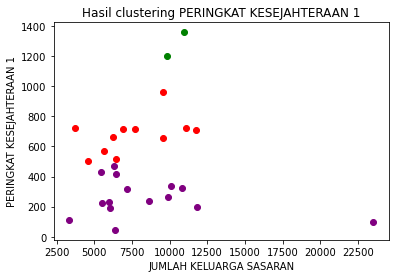

In [36]:
#Plot hasil scatter peringkat_kesejahteraan1
plt.scatter(res_kesejahtaraan1_0['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan1_0['PERINGKAT KESEJAHTERAAN 1'],color = 'red')
plt.scatter(res_kesejahtaraan1_1['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan1_1['PERINGKAT KESEJAHTERAAN 1'], color = 'purple')
plt.scatter(res_kesejahtaraan1_2['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan1_2['PERINGKAT KESEJAHTERAAN 1'],color = 'green')


plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PERINGKAT KESEJAHTERAAN 1')
plt.title('Hasil clustering PERINGKAT KESEJAHTERAAN 1')
plt.show()

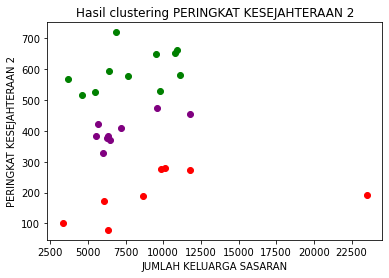

In [37]:

#Plot hasil scatter peringkat_kesejahteraan2
plt.scatter(res_kesejahtaraan2_0['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan2_0['PERINGKAT KESEJAHTERAAN 2'],color = 'red')
plt.scatter(res_kesejahtaraan2_1['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan2_1['PERINGKAT KESEJAHTERAAN 2'], color = 'purple')
plt.scatter(res_kesejahtaraan2_2['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan2_2['PERINGKAT KESEJAHTERAAN 2'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PERINGKAT KESEJAHTERAAN 2')
plt.title('Hasil clustering PERINGKAT KESEJAHTERAAN 2')
plt.show()

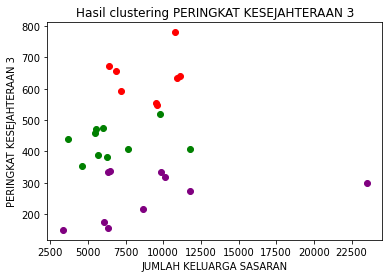

In [38]:
#Plot hasil scatter peringkat_kesejahteraan3
plt.scatter(res_kesejahtaraan3_0['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan3_0['PERINGKAT KESEJAHTERAAN 3'],color = 'red')
plt.scatter(res_kesejahtaraan3_1['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan3_1['PERINGKAT KESEJAHTERAAN 3'], color = 'purple')
plt.scatter(res_kesejahtaraan3_2['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan3_2['PERINGKAT KESEJAHTERAAN 3'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PERINGKAT KESEJAHTERAAN 3')
plt.title('Hasil clustering PERINGKAT KESEJAHTERAAN 3')
plt.show()

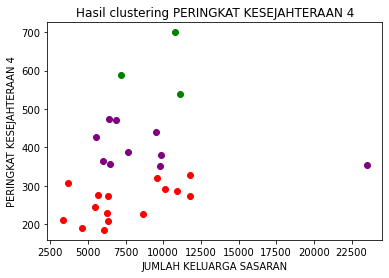

In [39]:
#Plot hasil scatter peringkat_kesejahteraan4
plt.scatter(res_kesejahtaraan4_0['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan4_0['PERINGKAT KESEJAHTERAAN 4'],color = 'red')
plt.scatter(res_kesejahtaraan4_1['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan4_1['PERINGKAT KESEJAHTERAAN 4'], color = 'purple')
plt.scatter(res_kesejahtaraan4_2['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan4_2['PERINGKAT KESEJAHTERAAN 4'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PERINGKAT KESEJAHTERAAN 4')
plt.title('Hasil clustering PERINGKAT KESEJAHTERAAN 4')
plt.show()

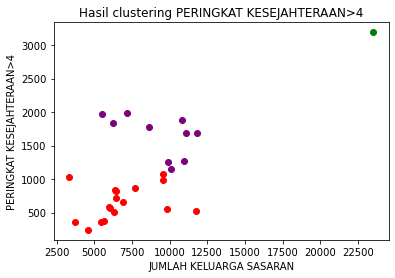

In [40]:
#Plot hasil scatter peringkat_kesejahteraan4plus
plt.scatter(res_kesejahtaraan4plus_0['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan4plus_0['PERINGKAT KESEJAHTERAAN\n> 4'],color = 'red')
plt.scatter(res_kesejahtaraan4plus_1['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan4plus_1['PERINGKAT KESEJAHTERAAN\n> 4'], color = 'purple')
plt.scatter(res_kesejahtaraan4plus_2['JUMLAH KELUARGA SASARAN'],res_kesejahtaraan4plus_2['PERINGKAT KESEJAHTERAAN\n> 4'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PERINGKAT KESEJAHTERAAN>4')
plt.title('Hasil clustering PERINGKAT KESEJAHTERAAN>4')
plt.show()

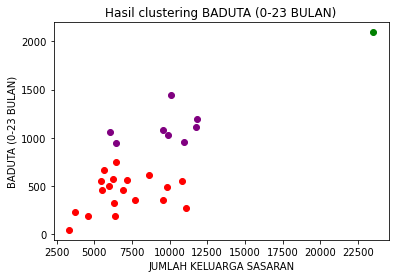

In [41]:
#Plot hasil scatter BADUTA (0-23 BULAN)
plt.scatter(res_baduta_0_23bulan_0['JUMLAH KELUARGA SASARAN'],res_baduta_0_23bulan_0['BADUTA (0-23 BULAN)'],color = 'red')
plt.scatter(res_baduta_0_23bulan_1['JUMLAH KELUARGA SASARAN'],res_baduta_0_23bulan_1['BADUTA (0-23 BULAN)'], color = 'purple')
plt.scatter(res_baduta_0_23bulan_2['JUMLAH KELUARGA SASARAN'],res_baduta_0_23bulan_2['BADUTA (0-23 BULAN)'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('BADUTA (0-23 BULAN)')
plt.title('Hasil clustering BADUTA (0-23 BULAN)')
plt.show()

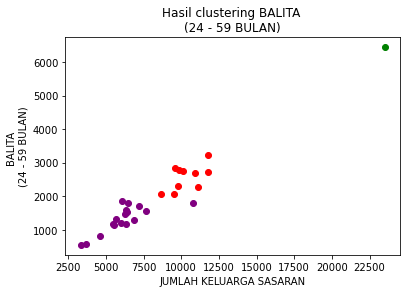

In [42]:
#Plot hasil scatter BALITA \n(24 - 59 BULAN)
plt.scatter(res_balita_24_59bulan_0['JUMLAH KELUARGA SASARAN'],res_balita_24_59bulan_0['BALITA \n(24 - 59 BULAN)'],color = 'red')
plt.scatter(res_balita_24_59bulan_1['JUMLAH KELUARGA SASARAN'],res_balita_24_59bulan_1['BALITA \n(24 - 59 BULAN)'], color = 'purple')
plt.scatter(res_balita_24_59bulan_2['JUMLAH KELUARGA SASARAN'],res_balita_24_59bulan_2['BALITA \n(24 - 59 BULAN)'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('BALITA \n(24 - 59 BULAN)')
plt.title('Hasil clustering BALITA \n(24 - 59 BULAN)')
plt.show()

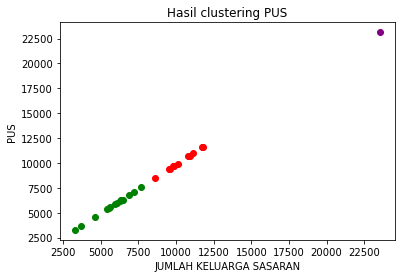

In [43]:
#Plot hasil scatter PUS
plt.scatter(res_pus_0['JUMLAH KELUARGA SASARAN'],res_pus_0['PUS'],color = 'red')
plt.scatter(res_pus_1['JUMLAH KELUARGA SASARAN'],res_pus_1['PUS'], color = 'purple')
plt.scatter(res_pus_2['JUMLAH KELUARGA SASARAN'],res_pus_2['PUS'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PUS')
plt.title('Hasil clustering PUS')
plt.show()

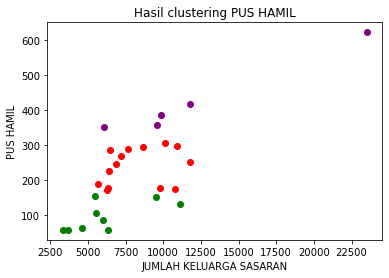

In [44]:
#Plot hasil scatter PUS HAMIL
plt.scatter(res_pus_hamil_0['JUMLAH KELUARGA SASARAN'],res_pus_hamil_0['PUS HAMIL'],color = 'red')
plt.scatter(res_pus_hamil_1['JUMLAH KELUARGA SASARAN'],res_pus_hamil_1['PUS HAMIL'], color = 'purple')
plt.scatter(res_pus_hamil_2['JUMLAH KELUARGA SASARAN'],res_pus_hamil_2['PUS HAMIL'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('PUS HAMIL')
plt.title('Hasil clustering PUS HAMIL')
plt.show()

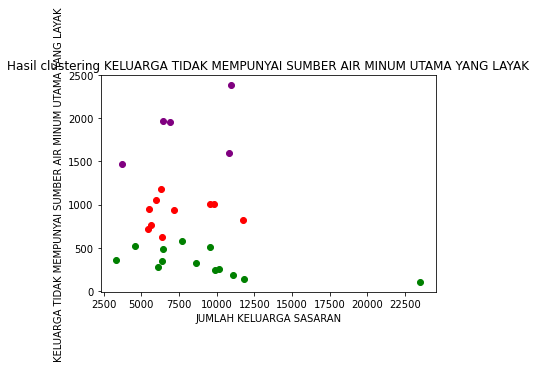

In [45]:
#Plot hasil scatter KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK
plt.scatter(res_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak_0['JUMLAH KELUARGA SASARAN'],res_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak_0['KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK'],color = 'red')
plt.scatter(res_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak_1['JUMLAH KELUARGA SASARAN'],res_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak_1['KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK'], color = 'purple')
plt.scatter(res_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak_2['JUMLAH KELUARGA SASARAN'],res_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak_2['KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK')
plt.title('Hasil clustering KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK')
plt.show()

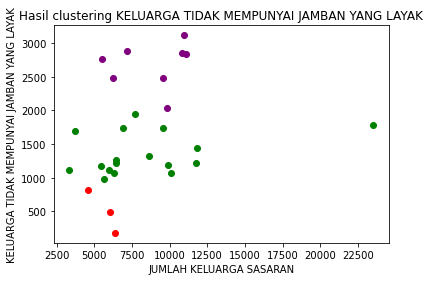

In [46]:
#Plot hasil scatter KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK
plt.scatter(res_keluarga_tidak_mempunyai_jamban_yang_layak_0['JUMLAH KELUARGA SASARAN'],res_keluarga_tidak_mempunyai_jamban_yang_layak_0['KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK'],color = 'red')
plt.scatter(res_keluarga_tidak_mempunyai_jamban_yang_layak_1['JUMLAH KELUARGA SASARAN'],res_keluarga_tidak_mempunyai_jamban_yang_layak_1['KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK'], color = 'purple')
plt.scatter(res_keluarga_tidak_mempunyai_jamban_yang_layak_2['JUMLAH KELUARGA SASARAN'],res_keluarga_tidak_mempunyai_jamban_yang_layak_2['KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK')
plt.title('Hasil clustering KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK')
plt.show()

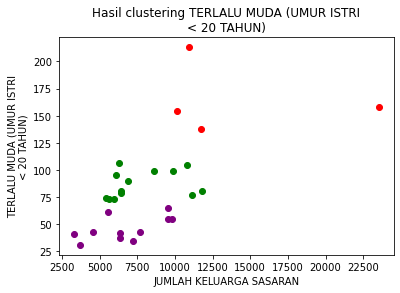

In [47]:
#Plot hasil scatter TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)
plt.scatter(res_terlalu_muda_istri20_0['JUMLAH KELUARGA SASARAN'],res_terlalu_muda_istri20_0['TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)'],color = 'red')
plt.scatter(res_terlalu_muda_istri20_1['JUMLAH KELUARGA SASARAN'],res_terlalu_muda_istri20_1['TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)'], color = 'purple')
plt.scatter(res_terlalu_muda_istri20_2['JUMLAH KELUARGA SASARAN'],res_terlalu_muda_istri20_2['TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)')
plt.title('Hasil clustering TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)')
plt.show()

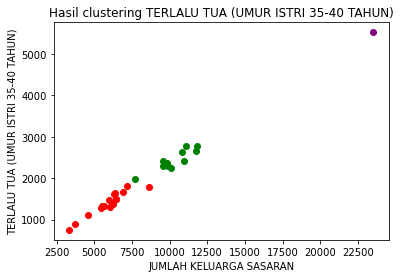

In [48]:
#Plot hasil scatter TERLALU TUA (UMUR ISTRI 35-40 TAHUN)
plt.scatter(res_terlalu_tua_istri3540_0['JUMLAH KELUARGA SASARAN'],res_terlalu_tua_istri3540_0['TERLALU TUA (UMUR ISTRI 35-40 TAHUN)'],color = 'red')
plt.scatter(res_terlalu_tua_istri3540_1['JUMLAH KELUARGA SASARAN'],res_terlalu_tua_istri3540_1['TERLALU TUA (UMUR ISTRI 35-40 TAHUN)'], color = 'purple')
plt.scatter(res_terlalu_tua_istri3540_2['JUMLAH KELUARGA SASARAN'],res_terlalu_tua_istri3540_2['TERLALU TUA (UMUR ISTRI 35-40 TAHUN)'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('TERLALU TUA (UMUR ISTRI 35-40 TAHUN)')
plt.title('Hasil clustering TERLALU TUA (UMUR ISTRI 35-40 TAHUN)')
plt.show()

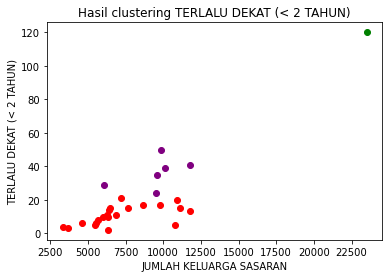

In [49]:
#Plot hasil scatter TERLALU DEKAT (< 2 TAHUN)
plt.scatter(res_terlalu_dekat_2tahun_0['JUMLAH KELUARGA SASARAN'],res_terlalu_dekat_2tahun_0['TERLALU DEKAT (< 2 TAHUN)'],color = 'red')
plt.scatter(res_terlalu_dekat_2tahun_1['JUMLAH KELUARGA SASARAN'],res_terlalu_dekat_2tahun_1['TERLALU DEKAT (< 2 TAHUN)'], color = 'purple')
plt.scatter(res_terlalu_dekat_2tahun_2['JUMLAH KELUARGA SASARAN'],res_terlalu_dekat_2tahun_2['TERLALU DEKAT (< 2 TAHUN)'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('TERLALU DEKAT (< 2 TAHUN)')
plt.title('Hasil clustering TERLALU DEKAT (< 2 TAHUN)')
plt.show()

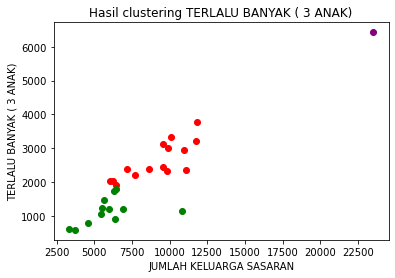

In [50]:
#Plot hasil scatter TERLALU BANYAK ( 3 ANAK)
plt.scatter(res_terlalu_banyak_3anak_0['JUMLAH KELUARGA SASARAN'],res_terlalu_banyak_3anak_0['TERLALU BANYAK ( 3 ANAK)'],color = 'red')
plt.scatter(res_terlalu_banyak_3anak_1['JUMLAH KELUARGA SASARAN'],res_terlalu_banyak_3anak_1['TERLALU BANYAK ( 3 ANAK)'], color = 'purple')
plt.scatter(res_terlalu_banyak_3anak_2['JUMLAH KELUARGA SASARAN'],res_terlalu_banyak_3anak_2['TERLALU BANYAK ( 3 ANAK)'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('TERLALU BANYAK ( 3 ANAK)')
plt.title('Hasil clustering TERLALU BANYAK ( 3 ANAK)')
plt.show()

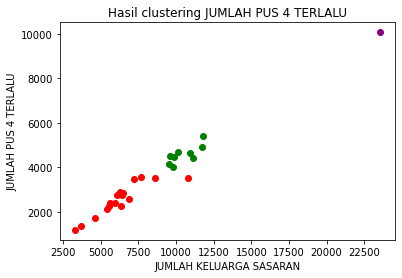

In [51]:
#Plot hasil scatter JUMLAH PUS 4 TERLALU
plt.scatter(res_jumlah_pus_4terlalu_0['JUMLAH KELUARGA SASARAN'],res_jumlah_pus_4terlalu_0['JUMLAH PUS 4 TERLALU'],color = 'red')
plt.scatter(res_jumlah_pus_4terlalu_1['JUMLAH KELUARGA SASARAN'],res_jumlah_pus_4terlalu_1['JUMLAH PUS 4 TERLALU'], color = 'purple')
plt.scatter(res_jumlah_pus_4terlalu_2['JUMLAH KELUARGA SASARAN'],res_jumlah_pus_4terlalu_2['JUMLAH PUS 4 TERLALU'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('JUMLAH PUS 4 TERLALU')
plt.title('Hasil clustering JUMLAH PUS 4 TERLALU')
plt.show()

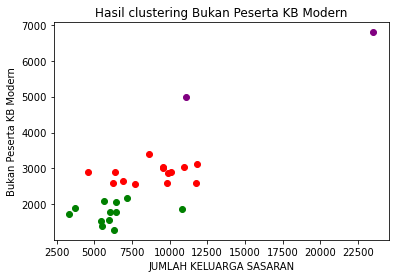

In [52]:
#Plot hasil scatter Bukan Peserta KB Modern
plt.scatter(res_bukan_peserta_kb_modern_0['JUMLAH KELUARGA SASARAN'],res_bukan_peserta_kb_modern_0['Bukan Peserta KB Modern'],color = 'red')
plt.scatter(res_bukan_peserta_kb_modern_1['JUMLAH KELUARGA SASARAN'],res_bukan_peserta_kb_modern_1['Bukan Peserta KB Modern'], color = 'purple')
plt.scatter(res_bukan_peserta_kb_modern_2['JUMLAH KELUARGA SASARAN'],res_bukan_peserta_kb_modern_2['Bukan Peserta KB Modern'],color = 'green')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('Bukan Peserta KB Modern')
plt.title('Hasil clustering Bukan Peserta KB Modern')
plt.show()

# EVALUASI

In [53]:
kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(results)
results['K-means'] = pred
results.sort_values(['segment_peringkat_kesejahteraan1', 'segment_peringkat_kesejahteraan2', 'segment_peringkat_kesejahteraan3', 'segment_peringkat_kesejahteraan4', 'segment_peringkat_kesejahteraan4plus', 'segment_baduta_0_23bulan', 'segment_balita_24_59bulan', 'segment_pus', 'segment_pus_hamil', 'segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak', 'segment_keluarga_tidak_mempunyai_jamban_yang_layak', 'segment_terlalu_muda_istri20', 'segment_terlalu_tua_istri3540', 'segment_terlalu_dekat_2tahun', 'segment_terlalu_banyak_3anak', 'segment_jumlah_pus_4terlalu', 'segment_bukan_peserta_kb_modern'],ascending=False).style.background_gradient(cmap='viridis', low=0, high=0.2)

,JUMLAH KELUARGA SASARAN,PERINGKAT KESEJAHTERAAN 1,PERINGKAT KESEJAHTERAAN 2,PERINGKAT KESEJAHTERAAN 3,PERINGKAT KESEJAHTERAAN 4,PERINGKAT KESEJAHTERAAN > 4,BADUTA (0-23 BULAN),BALITA (24 - 59 BULAN),PUS,PUS HAMIL,KELUARGA TIDAK MEMPUNYAI SUMBER AIR MINUM UTAMA YANG LAYAK,KELUARGA TIDAK MEMPUNYAI JAMBAN YANG LAYAK,TERLALU MUDA (UMUR ISTRI < 20 TAHUN),TERLALU TUA (UMUR ISTRI 35-40 TAHUN),TERLALU DEKAT (< 2 TAHUN),TERLALU BANYAK ( 3 ANAK),JUMLAH PUS 4 TERLALU,Bukan Peserta KB Modern,segment_peringkat_kesejahteraan1,segment_peringkat_kesejahteraan2,segment_peringkat_kesejahteraan3,segment_peringkat_kesejahteraan4,segment_peringkat_kesejahteraan4plus,segment_baduta_0_23bulan,segment_balita_24_59bulan,segment_pus,segment_pus_hamil,segment_keluarga_tidak_mempunyai_sumber_air_minum_utama_yang_layak,segment_keluarga_tidak_mempunyai_jamban_yang_layak,segment_terlalu_muda_istri20,segment_terlalu_tua_istri3540,segment_terlalu_dekat_2tahun,segment_terlalu_banyak_3anak,segment_jumlah_pus_4terlalu,segment_bukan_peserta_kb_modern,K-means
8,9807,1200,530,521,351,559,494,2315,9666,178,1003,2037,55,2377,17,2316,4020,2607,2,2,2,1,0,0,0,0,0,0,1,1,2,0,0,2,0,0
5,10923,1359,663,634,286,1271,959,2703,10680,298,2391,3113,213,2427,20,2960,4648,3047,2,2,0,0,1,1,0,0,0,1,1,0,2,0,0,2,0,0
26,5447,430,526,459,246,353,555,1173,5381,156,716,1165,74,1289,5,1067,2125,1527,1,2,2,0,0,0,1,2,2,0,2,2,0,0,2,0,2,1
18,10799,323,652,780,700,1877,548,1791,10709,176,1602,2856,105,2642,5,1132,3512,1866,1,2,0,2,1,0,1,0,0,1,1,2,2,0,2,0,2,0
21,5534,225,385,471,428,1971,453,1145,5487,106,953,2759,61,1327,6,1240,2259,1384,1,1,2,1,1,0,1,2,2,0,1,1,0,0,2,0,2,1
25,5974,230,328,476,365,588,498,1201,5908,86,1058,1106,73,1463,10,1212,2380,1552,1,1,2,1,0,0,1,2,2,0,2,2,0,0,2,0,2,1
22,6455,418,369,338,358,716,948,1788,6315,286,479,1256,79,1498,15,1904,2861,2064,1,1,1,1,0,1,1,2,0,2,2,2,0,0,0,0,2,1
7,6333,468,382,334,274,506,325,1586,6245,179,624,1068,42,1622,10,1729,2855,1286,1,1,1,0,0,0,1,2,0,0,2,1,0,0,2,0,2,1
3,7191,319,410,592,588,1983,557,1703,7064,268,937,2881,35,1822,21,2387,3500,2184,1,1,0,2,1,0,1,2,0,0,1,1,0,0,0,0,2,1
13,23517,96,193,299,355,3191,2095,6444,23138,622,97,1783,158,5529,120,6429,10080,6794,1,0,1,1,2,2,2,1,1,2,2,0,1,2,1,1,1,2


Cluster 0 = data ke 27,6,26,9,19,1,7,15,4,22,23,2,24,25,21,3
Cluster 1 = data ke 13
Cluster 2 = data ke 5,8,20,0,10,11,16,17,14,12,18

In [54]:
res_kmeans_0 = results[results["K-means"]==0]
res_kmeans_1 = results[results["K-means"]==1]
res_kmeans_2 = results[results["K-means"]==2]

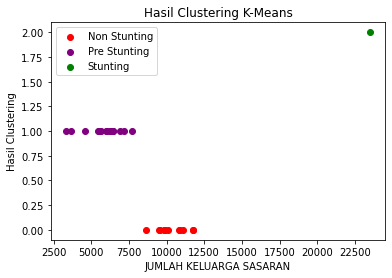

In [55]:
#Plot hasil scatter peringkat_kesejahteraan4
plt.scatter(res_kmeans_0['JUMLAH KELUARGA SASARAN'],res_kmeans_0['K-means'],color = 'red',label='Non Stunting')
plt.scatter(res_kmeans_1['JUMLAH KELUARGA SASARAN'],res_kmeans_1['K-means'], color = 'purple',label='Pre Stunting')
plt.scatter(res_kmeans_2['JUMLAH KELUARGA SASARAN'],res_kmeans_2['K-means'],color = 'green',label='Stunting')

plt.xlabel('JUMLAH KELUARGA SASARAN')
plt.ylabel('Hasil Clustering')
plt.title('Hasil Clustering K-Means')
# Menampilkan legenda
plt.legend()

plt.show()

In [56]:
labels = kmeans.labels_
dbi_score = davies_bouldin_score (results, labels)
print("Davies-Bouldin Index (DBI):", dbi_score)

Davies-Bouldin Index (DBI): 0.42849497703676614


nilai DBI sebesar 0.428 menunjukkan bahwa klasterisasi yang dilakukan relatif baik, karena nilai tersebut mendekati nol.

ANOVA dilakukan untuk menguji apakah ada perbedaan signifikan antara kelompok kluster dalam fitur tersebut.

In [57]:
from sklearn.cluster import KMeans
from scipy.stats import f_oneway

# Perform K-means clustering
kmeans = KMeans(n_clusters=k)
df['K-means'] = kmeans.fit_predict(cluster_data)

# Perform ANOVA for each feature
anova_results = {}
for feature in cluster_data.columns:
    if feature != 'K-means':  # Exclude the 'K-means' column from ANOVA
        clusters = [df[df['K-means'] == i][feature] for i in range(k)]
        f_statistic, p_value = f_oneway(*clusters)
        anova_results[feature] = p_value

# Filter fitur yang memili ambang batas <0,05
significant_features = [feature for feature, p_value in anova_results.items() if p_value < 0.05]

print("Significant features:", significant_features)

Significant features: ['JUMLAH KELUARGA SASARAN', 'PERINGKAT KESEJAHTERAAN\n> 4', 'BADUTA (0-23 BULAN)', 'BALITA \n(24 - 59 BULAN)', 'PUS', 'PUS HAMIL', 'TERLALU MUDA (UMUR ISTRI\n< 20 TAHUN)', 'TERLALU TUA (UMUR ISTRI 35-40 TAHUN)', 'TERLALU DEKAT (< 2 TAHUN)', 'TERLALU BANYAK ( 3 ANAK)', 'JUMLAH PUS 4 TERLALU', 'Bukan Peserta KB Modern']
